In [1]:
import pandas as pd

base = pd.read_csv('data/merged_vlp_otd_anonimized.csv')
df_strikes = pd.read_csv('data/stra_2023_11_21.csv')

In [2]:
df_strikes_dummies = pd.get_dummies(df_strikes['type_strike'], prefix='strike')

# Concatenating the dummy variables with the original DataFrame
df_strikes_with_dummies = pd.concat([df_strikes, df_strikes_dummies], axis=1)

df_strikes_with_dummies

,close_date,order_number,driver_company,drop_status,otd,type_strike,strike_Calidad,strike_Cancelación,strike_Faltantes,strike_OTD
0,2022-12-27,263960408_37172318365491,TRANSOASIS,CANCELLED,True,Cancelación,0,1,0,0
1,2022-12-27,270015031_36262877232678,RK TRANSPORTES,CANCELLED,True,Cancelación,0,1,0,0
2,2022-12-31,130227237_154405948220429,FSP AGILOG TRANSPORTES,CANCELLED,False,Cancelación,0,1,0,0
3,2022-12-21,58981493_52257075162912,RK TRANSPORTES,CANCELLED,True,Cancelación,0,1,0,0
4,2022-12-21,91769184_23238901276332,INDEPENDIENTES,CANCELLED,False,Cancelación,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
46387,2023-09-15,353639795_11553824995415,NaN,CANCELLED,True,Cancelación,0,1,0,0
46388,2023-08-17,352656487_22208728225307,INDEPENDIENTES,CANCELLED,True,Cancelación,0,1,0,0
46389,2023-08-09,347917425_284140158443879,TRANSOASIS,CANCELLED,True,Cancelación,0,1,0,0
46390,2023-07-15,349102782_12373070992360,INDEPENDIENTES,CANCELLED,False,Cancelación,0,1,0,0


In [3]:
strikes = df_strikes_with_dummies.groupby(['order_number','driver_company','drop_status','close_date']).max()
strikes.reset_index(inplace= True)
strikes.head()

,order_number,driver_company,drop_status,close_date,otd,type_strike,strike_Calidad,strike_Cancelación,strike_Faltantes,strike_OTD
0,100128959_150644084950498,INDEPENDIENTES,COMPLETED,2023-01-20,True,Faltantes,0,0,1,0
1,100128959_161305410537881,INDEPENDIENTES,COMPLETED,2023-02-17,True,Faltantes,0,0,1,0
2,100128959_19734534370816,INDEPENDIENTES,COMPLETED,2023-07-18,True,Faltantes,0,0,1,0
3,100128959_46836221602997,INDEPENDIENTES,CANCELLED,2023-04-19,True,Cancelación,0,1,0,0
4,100128959_6796348029770,INDEPENDIENTES,COMPLETED,2023-05-05,True,Calidad,1,0,0,0


In [4]:
base.columns

Index(['source_id', 'birthday', 'month_order', 'year_order', 'ornum',
       'order_close_date', 'city', 'segmento', 'gmv_on_3', 'active',
       'is_graduated', 'is_kam', 'reactivation_status', 'microzone_source_id',
       'warehouse', 'deliver_date', 'trip_id', 'ontime_num',
       'payment_method_code', 'dispatch_warehouse', 'stop_number',
       'customer_id'],
      dtype='object')

In [5]:
merge_df = base.merge(strikes, left_on='ornum', right_on='order_number', how='left')


In [6]:
merge_df[['strike_Calidad', 'strike_Cancelación', 'strike_Faltantes', 'strike_OTD']] = merge_df[['strike_Calidad', 'strike_Cancelación', 'strike_Faltantes', 'strike_OTD']].fillna(0)
merge_df.drop(columns=['close_date','otd','type_strike','order_number','driver_company','drop_status'], inplace = True)

In [7]:
churn_df = pd.read_csv('data/rfm.csv')

churn_df = churn_df[['churned','frequency','customer_id','Segment']]


In [8]:
df = merge_df.merge(churn_df, on= 'customer_id', how= 'left')
df.head()

,source_id,birthday,month_order,year_order,ornum,order_close_date,city,segmento,gmv_on_3,active,...,dispatch_warehouse,stop_number,customer_id,strike_Calidad,strike_Cancelación,strike_Faltantes,strike_OTD,churned,frequency,Segment
0,61675290,2021-09-17,7,2023,61675290_143351339940541,2023-07-28,SPO,Restaurante,32.37042,True,...,VLP,9,1,0.0,0.0,0.0,0.0,True,3,Clientes Churneados
1,44578735,2021-04-09,7,2023,44578735_7798210436244,2023-07-28,SPO,Restaurante,84.43154,True,...,VLP,2,2,0.0,0.0,0.0,0.0,False,9,Clientes Leales
2,32696268,2021-01-08,7,2023,32696268_4951711420874,2023-07-28,SPO,Restaurante,56.48729,True,...,VLP,10,3,0.0,0.0,0.0,0.0,False,17,Clientes Leales
3,135039595,2022-03-31,7,2023,135039595_32785480989704,2023-07-28,SPO,Restaurante,83.47472,True,...,VLP,2,4,0.0,0.0,0.0,0.0,False,13,Clientes Leales
4,228885181,2022-10-07,7,2023,228885181_54824912230348,2023-07-28,SPO,Restaurante,108.02103,True,...,VLP,2,5,0.0,0.0,0.0,0.0,False,19,Clientes VIP


In [9]:
data = df.copy()

# Convert 'order_close_date' and 'birthday' into datetime format
data['order_close_date'] = pd.to_datetime(data['order_close_date'])
data['birthday'] = pd.to_datetime(data['birthday'])

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Removing 'source_id' from the dataset as instructed
data.drop(columns=['source_id'], inplace=True)

# Display the summary of missing values and the data types
data.dtypes, missing_values[missing_values > 0]



(birthday               datetime64[ns]
 month_order                     int64
 year_order                      int64
 ornum                          object
 order_close_date       datetime64[ns]
 city                           object
 segmento                       object
 gmv_on_3                      float64
 active                           bool
 is_graduated                     bool
 is_kam                           bool
 reactivation_status            object
 microzone_source_id           float64
 warehouse                      object
 deliver_date                   object
 trip_id                        object
 ontime_num                       bool
 payment_method_code            object
 dispatch_warehouse             object
 stop_number                     int64
 customer_id                     int64
 strike_Calidad                float64
 strike_Cancelación            float64
 strike_Faltantes              float64
 strike_OTD                    float64
 churned                 

In [10]:
from datetime import datetime

# Feature Engineering
# Calculate age of the customer at the time of each order
data['age_at_order'] = data['order_close_date'].dt.year - data['birthday'].dt.year

# Extract day of the week and month from 'order_close_date'
data['day_of_week'] = data['order_close_date'].dt.dayofweek
data['month'] = data['order_close_date'].dt.month

# Aggregate data at customer level
customer_agg = data.groupby('customer_id').agg({
    'order_close_date': ['min', 'max', 'count'],
    'gmv_on_3': 'mean',
    'age_at_order': 'mean',
    'day_of_week': 'mean',
    'month': 'mean',
    'frequency': 'last' 
}).reset_index()

# Renaming columns for clarity
customer_agg.columns = ['customer_id', 'first_order_date', 'last_order_date', 'total_orders', 'avg_order_value', 
                        'avg_age_at_order', 'avg_day_of_week', 'avg_month', 'latest_frequency']

# Calculate time since first purchase and time since last purchase (in days)
current_date = datetime.now()
customer_agg['days_since_first_purchase'] = (current_date - customer_agg['first_order_date']).dt.days
customer_agg['days_since_last_purchase'] = (current_date - customer_agg['last_order_date']).dt.days

# Display the aggregated customer data
customer_agg.head()


,customer_id,first_order_date,last_order_date,total_orders,avg_order_value,avg_age_at_order,avg_day_of_week,avg_month,latest_frequency,days_since_first_purchase,days_since_last_purchase
0,1,2023-01-16,2023-08-15,10,42.241430,2.0,2.400000,4.200000,3,309,98
1,2,2023-01-12,2023-08-30,24,84.172771,2.0,2.166667,4.541667,9,313,83
2,3,2023-01-09,2023-08-30,48,63.493172,2.0,1.395833,4.437500,17,316,83
3,4,2023-05-30,2023-08-26,14,77.517644,1.0,3.785714,6.928571,13,175,87
4,5,2023-01-05,2023-08-29,42,157.325215,1.0,2.809524,4.880952,19,320,84


In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Preparing the data for training the XGBoost model
X = customer_agg.drop(columns=['customer_id', 'first_order_date', 'last_order_date', 'latest_frequency'])
y = customer_agg['latest_frequency']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Training the model
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


5.353766569744159

In [12]:
y_test.describe()

count    1658.000000
mean       11.703860
std        20.366195
min         0.000000
25%         0.000000
50%         6.000000
75%        15.000000
max       348.000000
Name: latest_frequency, dtype: float64

In [14]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[11:22:16] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


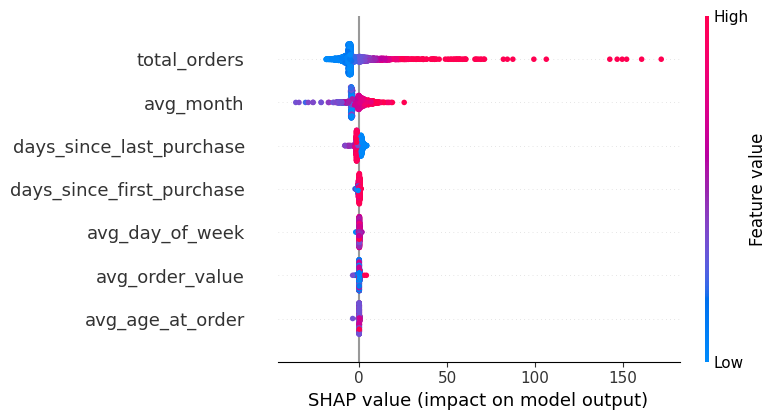

In [15]:
shap.summary_plot(shap_values, X_test)


In [16]:
shap.dependence_plot("feature_name", shap_values, X_test)


ValueError: Could not find feature named: feature_name

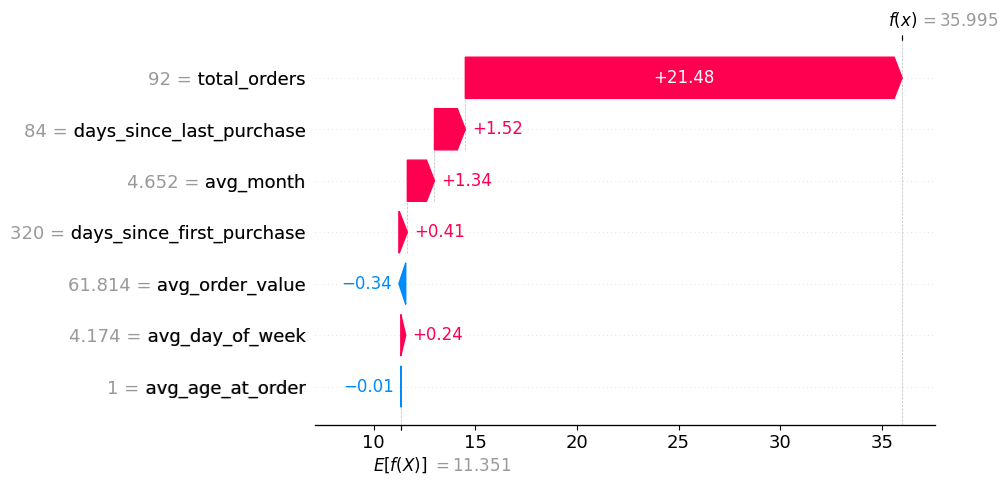

In [17]:
# For example, for the first instance in the test set
shap.plots.waterfall(shap_values[0])
